In [4]:
import math
import time
import pandas as pd
import numpy as np
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import style

from scipy.sparse import csr_array
from skimage import morphology, transform
from tifffile import imwrite
from PIL import Image

from joblib import Parallel, delayed
from functools import partial

import os
os.environ['R_HOME'] = '/usr/lib/R'
os.chdir('/laune_zfs/scratch/peter/f_active/paper_23/') # laune

random_seed = 42
np.random.seed(random_seed)

In [2]:
adata = sc.read_h5ad('input/03_rotation/adata_rotated_cleaned.h5ad')
adata.layers['counts'] = adata.X.copy()

d_adata = {}

for count, x in enumerate(adata.obs['sample_name'].unique()):
    d_adata[x] = adata[adata.obs['sample_name'] == x,].copy()

/home/peter/mambaforge/envs/GraphST/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


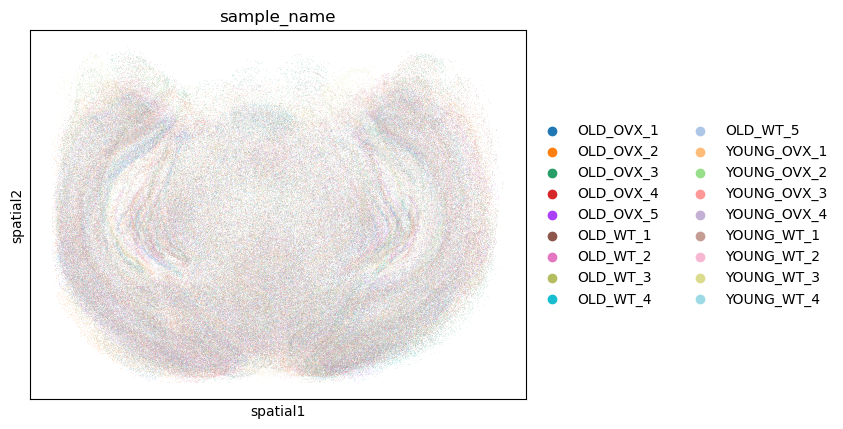

In [3]:
sc.pl.embedding(adata, basis='spatial', color = 'sample_name')

In [7]:
def export_arr_bin(k):
    print(k)
    v = d_adata[k].copy()
    coords = v.obsm['spatial']
    row = coords[:, 0]
    col = coords[:, 1]
    data = np.arange(1, v.shape[0]+1)
    arr = csr_array((data, (row, col))).toarray()
    arr_bin = arr > 0
    arr_bin_dilated = morphology.binary_dilation(arr_bin, footprint=np.ones((15,15)))
    im = Image.fromarray(arr_bin_dilated)
    im.save('input/04_alignment/' + k + '_binary.jpeg')
    # imwrite('input/04_alignment/' + k + '_binary.tif', arr_bin_dilated)

In [8]:
Parallel(n_jobs=-2)(delayed(export_arr_bin)(k) for k in d_adata.keys())

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

OLD_WT_3
OLD_OVX_1
OLD_OVX_4
YOUNG_WT_1
OLD_WT_5
YOUNG_WT_4
YOUNG_WT_3
YOUNG_OVX_3
OLD_OVX_2
OLD_WT_4
YOUNG_WT_2
YOUNG_OVX_4
OLD_WT_1
OLD_OVX_5
YOUNG_OVX_2
OLD_WT_2
OLD_OVX_3
YOUNG_OVX_1
